### Make sure you have saved the featuremaps(activations) to npy files

In [6]:
import numpy as np
from scipy import linalg

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
from scipy.optimize import curve_fit

fdict = {'MDM': '/home/zhenglin/Motion3D/text-to-motion/other_results/mdm/vald_motion_embeddings.npy',
         'MDM2': '/home/zhenglin/Motion3D/text-to-motion/other_results/mdm2/vald_motion_embeddings (1).npy',
         'MotionDiffuse': '/home/zhenglin/Motion3D/text-to-motion/other_results/MotionDiffuse/modified_predicted_embeddings.npy',
         'Text2Motion': '/home/zhenglin/Motion3D/text-to-motion/data_vae/motion/emb/emb_gen_none_None.npy',
         'priorMDM': '/home/zhenglin/Motion3D/priorMDM/vald_motion_embeddings.npy',
         'ACTOR': '/home/zhenglin/Motion3D/ACTOR/feats_gen.npy',
         'Action2Motion': '/home/zhenglin/Motion3D/action-to-motion/fake.npy'}

In [2]:
def del_nan(data):
    remov_rows = []
    if np.isnan(data).any():
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if np.isnan(data[i][j]):
                    remov_rows.append(i)
                    break
    data_safe = np.delete(data, remov_rows, axis=0)
    
    return data_safe

def load_embedding(fdict):
    data_dict = {}
    for name, path in fdict.items():
        data = np.load(path)
        if len(data.shape) == 3:
            data = data.mean(axis=1)
        assert len(data.shape) == 2
        print(name, data.shape)
        data_dict[name] = del_nan(data)
        
    return data_dict

In [3]:
data_dict = load_embedding(fdict)

MDM (704, 512)
MDM2 (1024, 512)
MotionDiffuse (704, 512)
Text2Motion (4608, 512)
priorMDM (32, 512)
ACTOR (1190, 30)
Action2Motion (3000, 30)


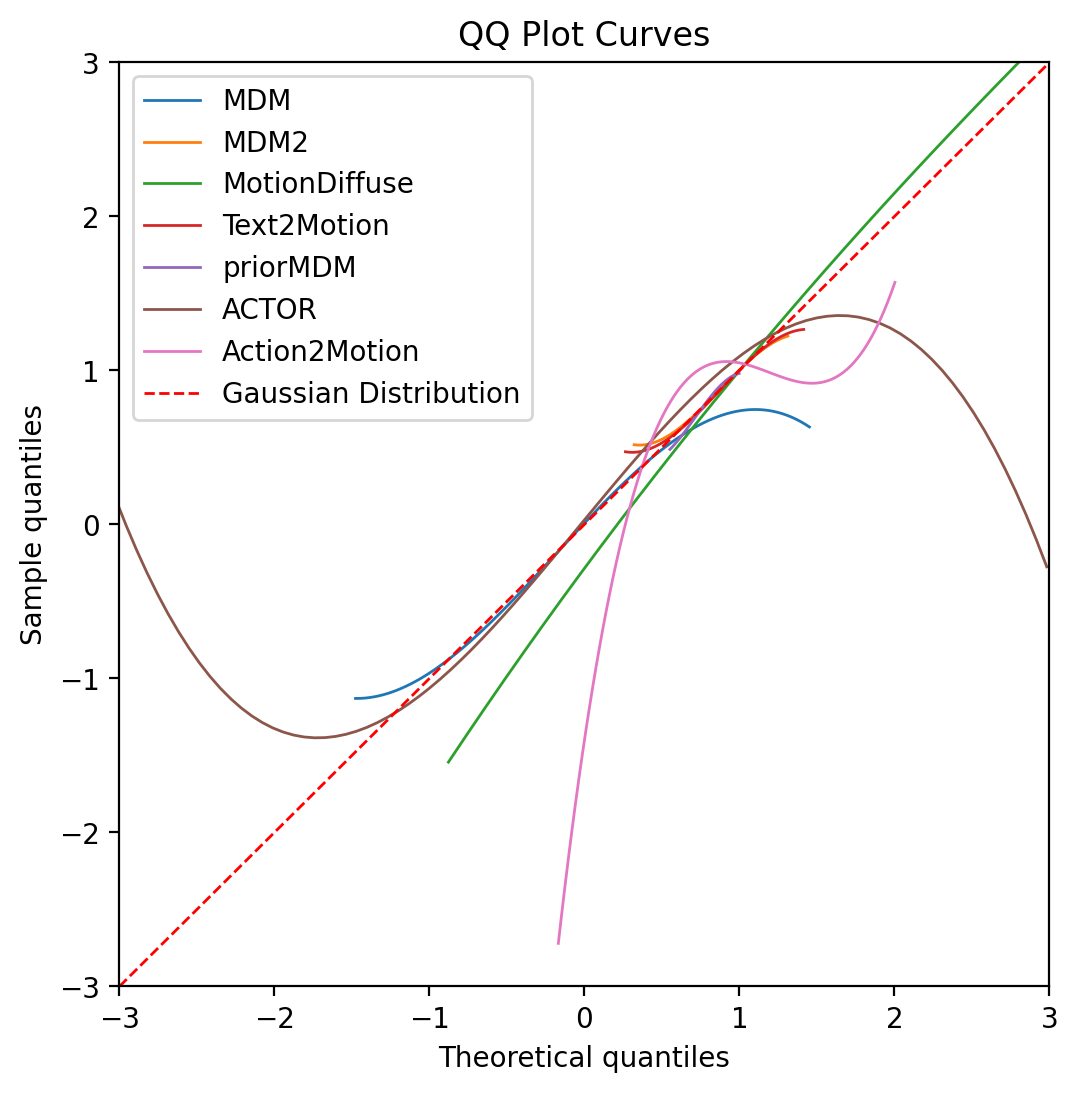

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# sns.set_theme()

def plot_qq_curve(data_dict, curve_degree=3):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=200)

    for name, data in data_dict.items():
        data = data[:, 0]   # only use the first dimension

        mu, sigma = np.mean(data), np.std(data)
        
        # Generate a real normal distribution with the same mean and variance
        real_normal = np.random.normal(mu, sigma, len(data))

        # Sort the data and real_normal arrays
        data_sorted = np.sort(data)
        real_sorted = np.sort(real_normal)

        # Fit a polynomial curve to the QQ plot points
        def custom_curve(x, *coefficients):
            return sum(coef * x**i for i, coef in enumerate(coefficients))

        initial_guess = np.zeros(curve_degree + 1)
        params, _ = curve_fit(custom_curve, real_sorted, data_sorted, p0=initial_guess)

        # Plot the custom curve
        x_fit = np.linspace(min(real_sorted), max(real_sorted), 100)
        y_fit = custom_curve(x_fit, *params)
        ax.plot(x_fit, y_fit, label=name, linewidth=1)

    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    
    # Draw a diagonal red straight line with a slope of 1
    xlim = ax.get_xlim()
    ax.plot(xlim, xlim, 'r--', label='Gaussian Distribution', linewidth=1)

    ax.set_title("QQ Plot Curves")
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Sample quantiles")
    ax.legend()
    plt.show()

# Example usage:
plot_qq_curve(data_dict, curve_degree=3)


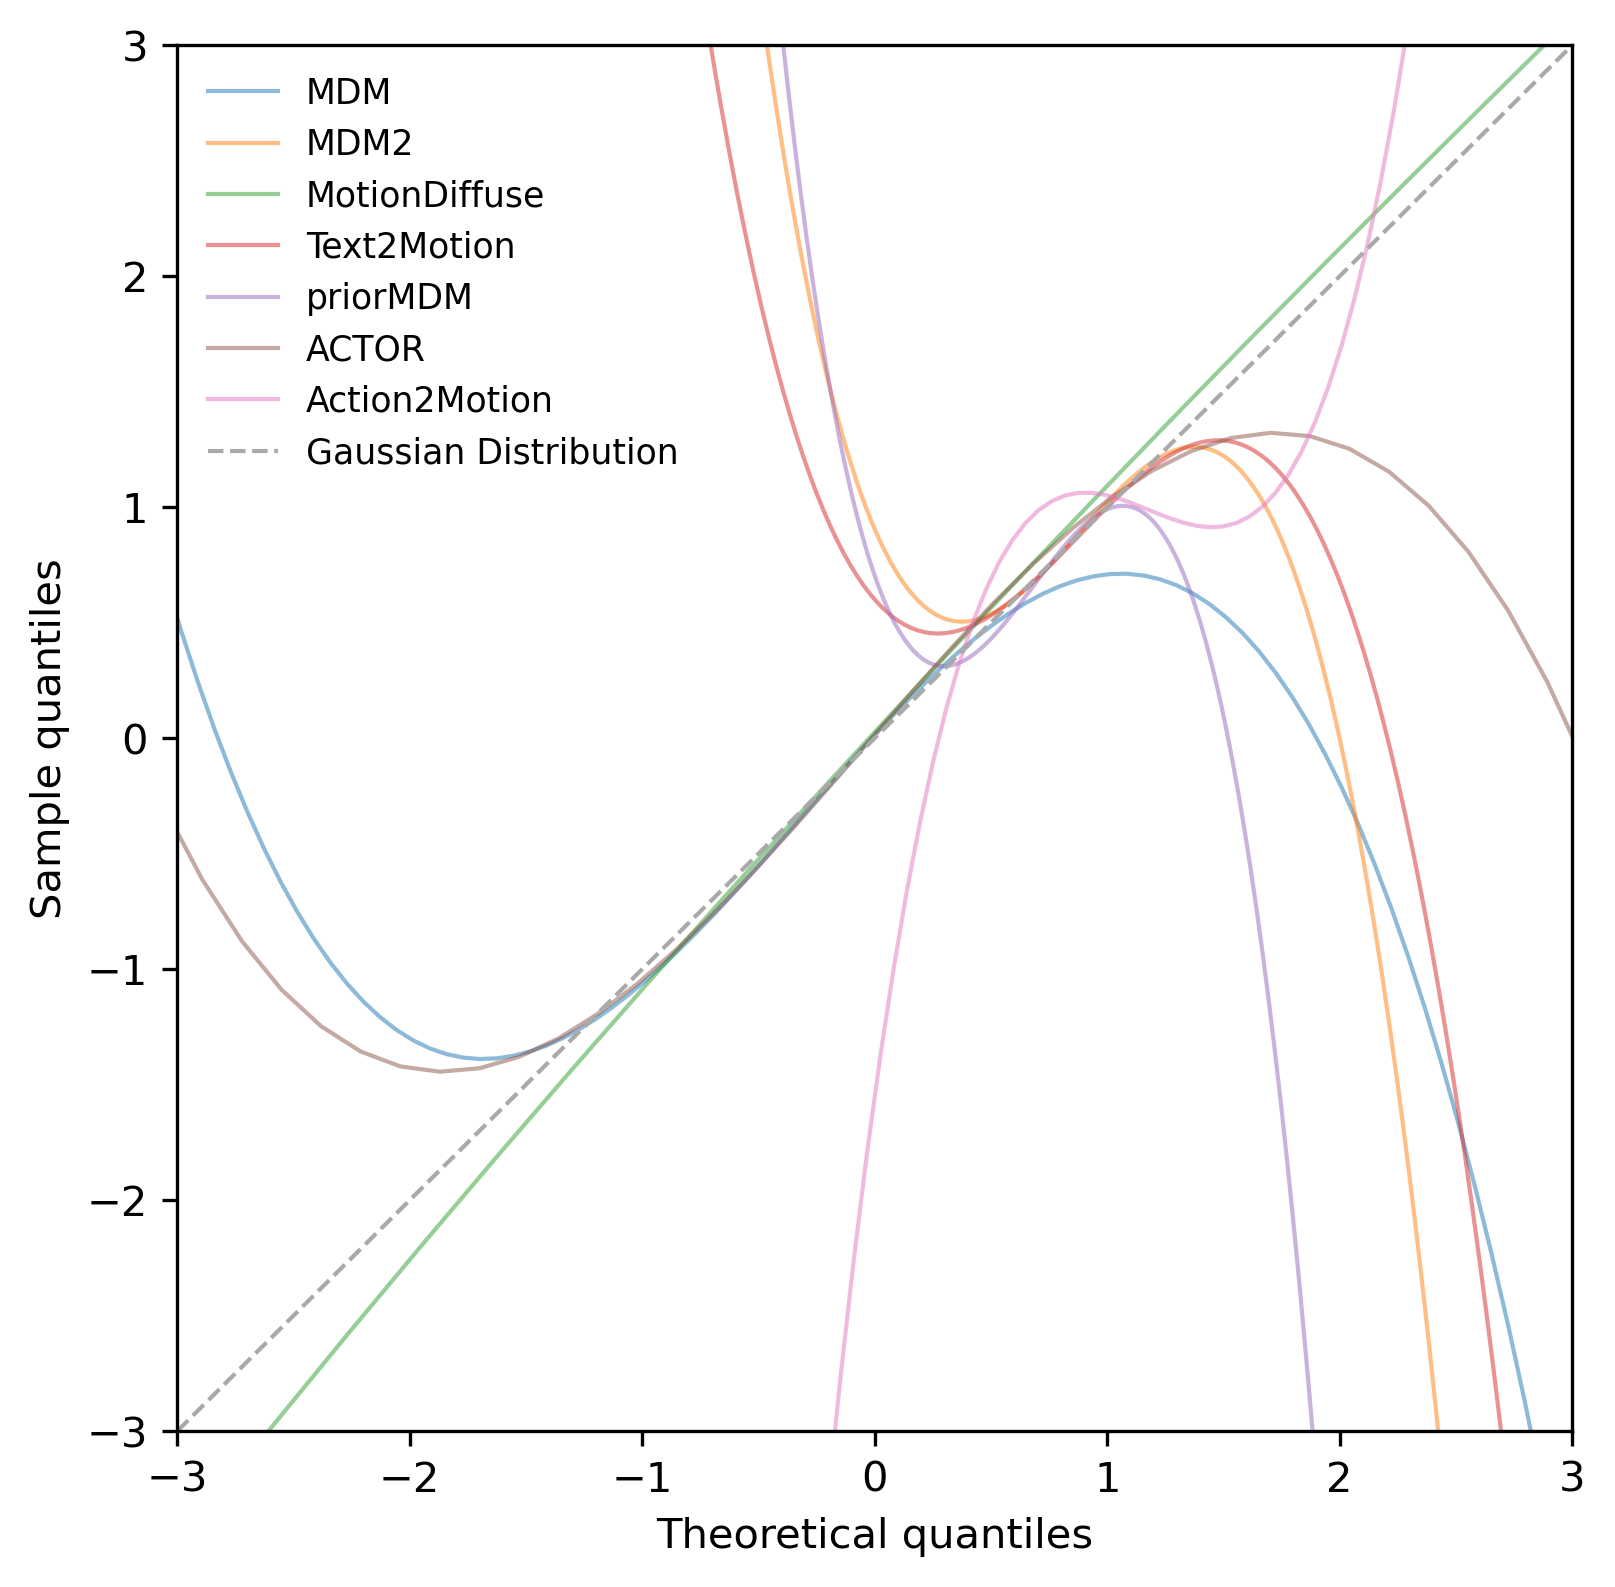

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# sns.set_theme()

def plot_qq_curve(data_dict, curve_degree=3, extend_factor=2):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

    for name, data in data_dict.items():
        data = data[:, 0]   # only use the first dimension

        mu, sigma = np.mean(data), np.std(data)
        
        # Generate a real normal distribution with the same mean and variance
        real_normal = np.random.normal(mu, sigma, len(data))

        # Sort the data and real_normal arrays
        data_sorted = np.sort(data)
        real_sorted = np.sort(real_normal)

        # Fit a polynomial curve to the QQ plot points
        def custom_curve(x, *coefficients):
            return sum(coef * x**i for i, coef in enumerate(coefficients))

        initial_guess = np.zeros(curve_degree + 1)
        params, _ = curve_fit(custom_curve, real_sorted, data_sorted, p0=initial_guess)

        # Extend the x-values for plotting the curve
        x_range = max(real_sorted) - min(real_sorted)
        x_extend = x_range * extend_factor
        x_fit = np.linspace(min(real_sorted) - x_extend, max(real_sorted) + x_extend, 200)
        y_fit = custom_curve(x_fit, *params)
        ax.plot(x_fit, y_fit, label=name, linewidth=1, alpha=0.5)

    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    # Draw a diagonal red straight line with a slope of 1
    ax.plot(ax.get_xlim(), ax.get_xlim(), '--', label='Gaussian Distribution', linewidth=1, color='darkgray')

    ax.set_title("")
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Sample quantiles")
    
    # Make the legend smaller and transparent
    legend = ax.legend(fontsize='small')
    legend.get_frame().set_alpha(0)

    plt.show()

# Example usage with extended curves:
plot_qq_curve(data_dict, curve_degree=3, extend_factor=2)


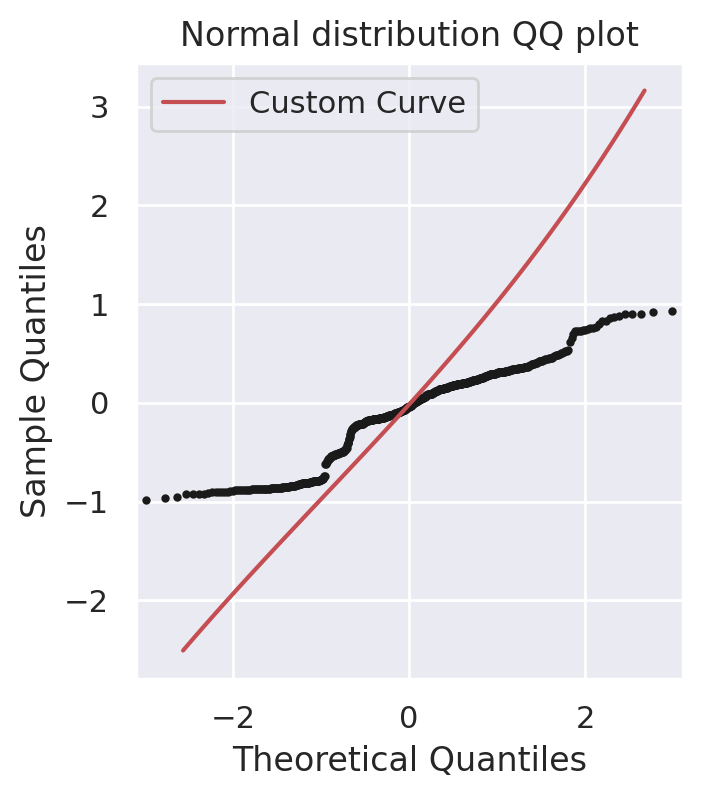

In [62]:
# sns.set_theme()
# %config InlineBackend.figure_format = 'retina'

mu, sigma = 0, 1
data_normal = np.random.normal(mu, sigma, 200)

# Generate a real normal distribution with the same mean and variance
real_normal = np.random.normal(mu, sigma, 200)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)

# Create the QQ plot without the line
# qqplot(data_normal, line=None, ax=ax1, fit=False, marker='.', markerfacecolor='k', markeredgecolor='k', markersize=4)
qqplot(data_dict['MDM'][:, 0], line=None, ax=ax1, fit=False, marker='.', markerfacecolor='k', markeredgecolor='k', markersize=4)
ax1.set_title("Normal distribution QQ plot")

# Sort the data and real_normal arrays
data_sorted = np.sort(data_normal)
real_sorted = np.sort(real_normal)

# Fit a high-degree polynomial curve (10-degree) to the QQ plot points
def custom_curve(x, *coefficients):
    return sum(coef * x**i for i, coef in enumerate(coefficients))

degree = 3
initial_guess = np.zeros(degree + 1)
params, _ = curve_fit(custom_curve, real_sorted, data_sorted, p0=initial_guess)

# Plot the custom curve
x_fit = np.linspace(min(real_sorted), max(real_sorted), 100)
y_fit = custom_curve(x_fit, *params)
ax1.plot(x_fit, y_fit, 'r-', label='Custom Curve')

plt.legend()
plt.show()


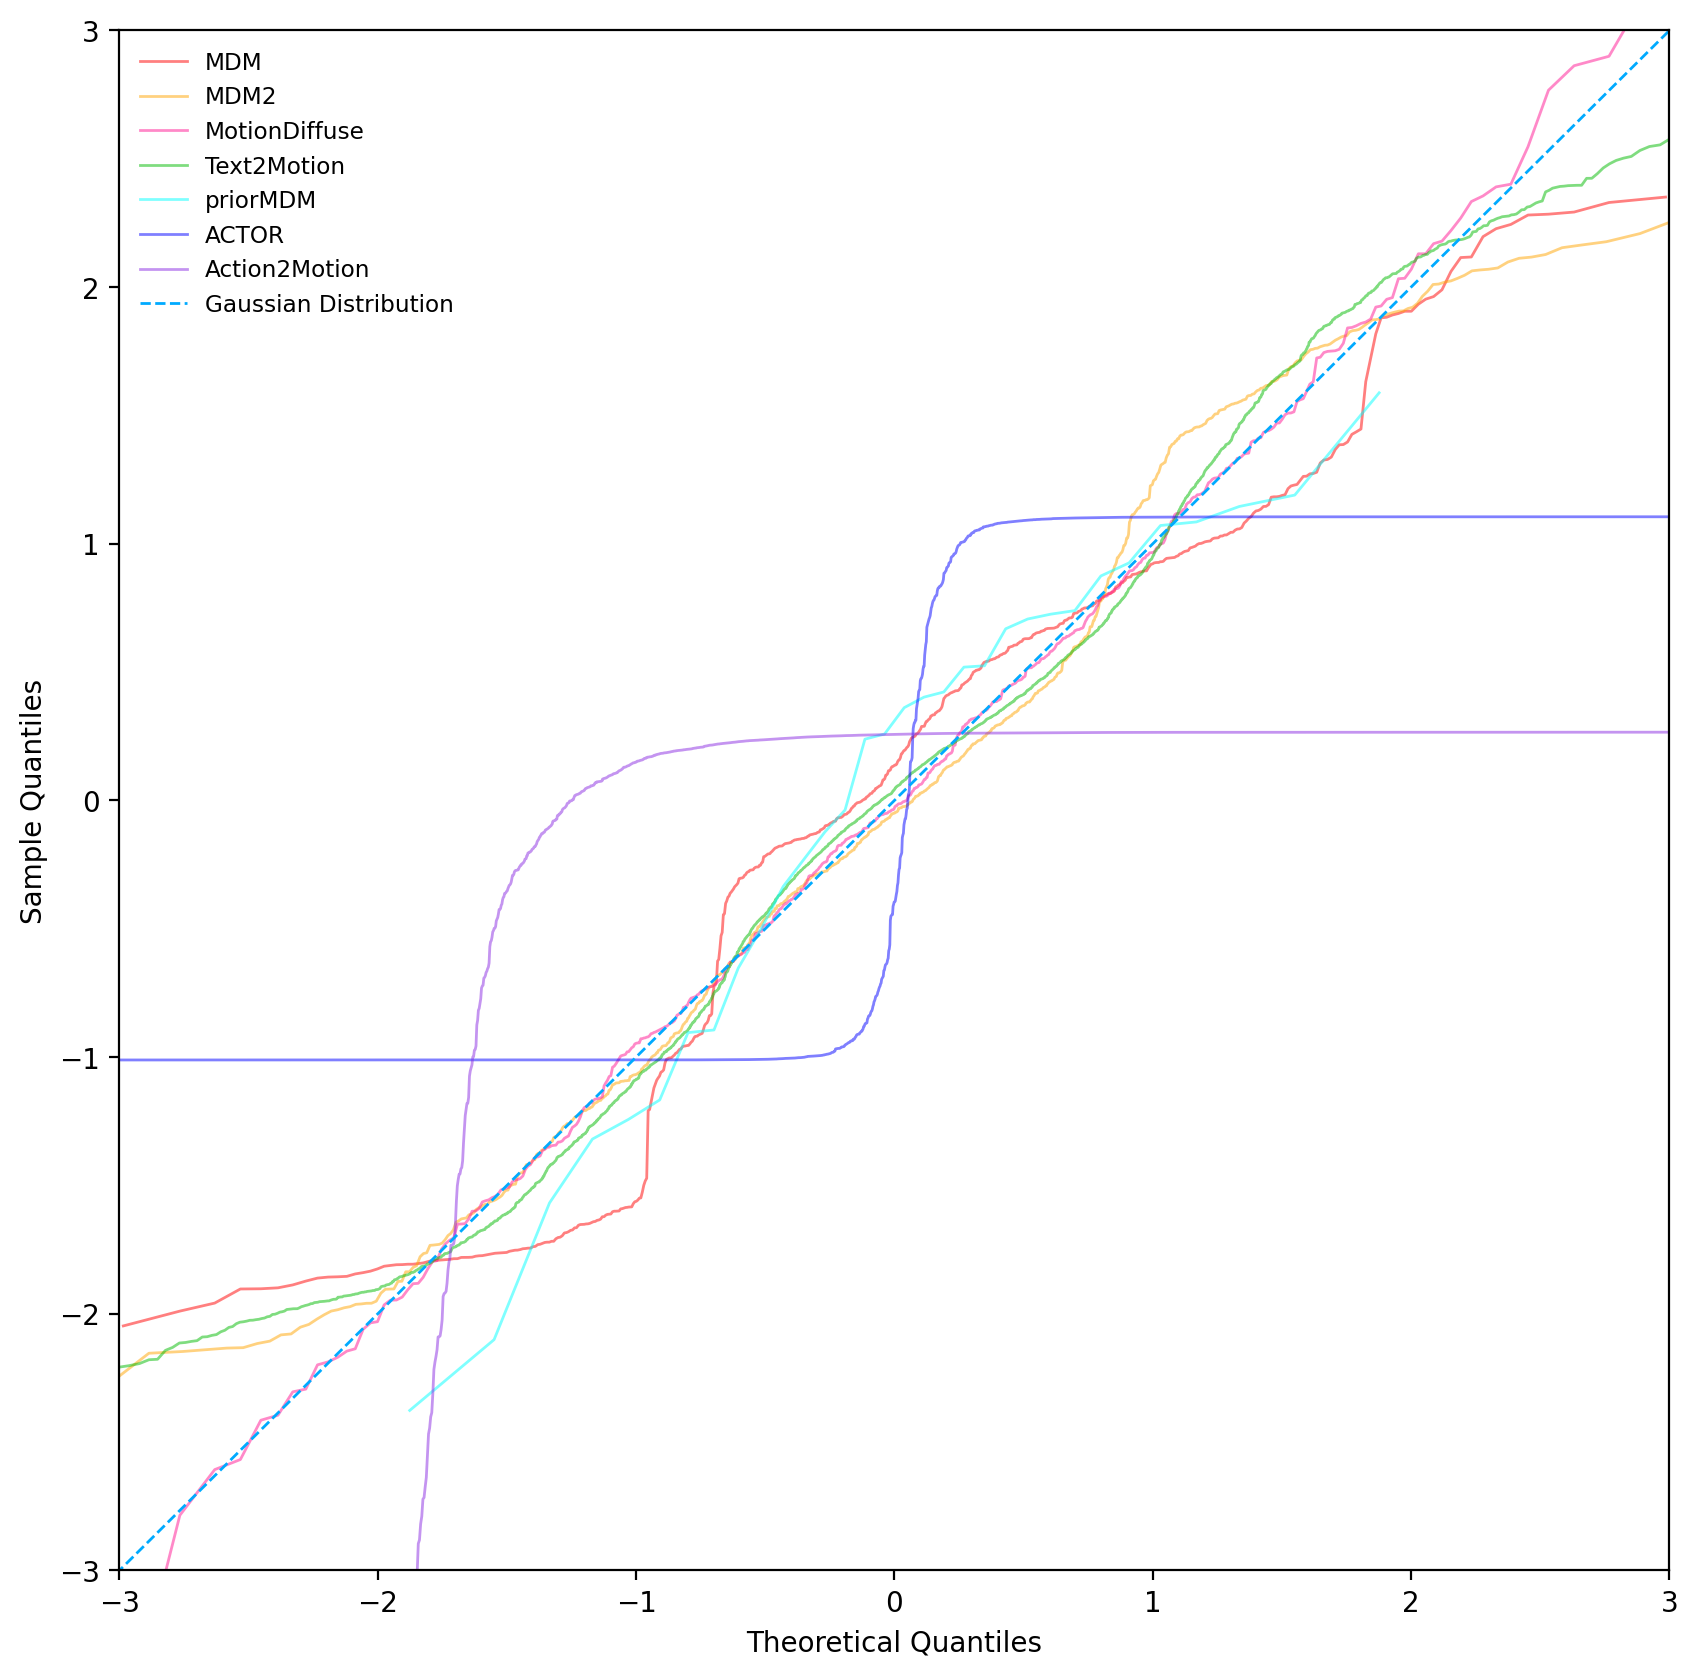

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), dpi=200)

astonishing_colors = ['#FF0000', '#FFA500', '#FF1493', '#00bb00', '#00FFFF', '#0000FF', '#8A2BE2', '#BB00FF', '#FF1493', '#00FF7F']
cnt = 0
for name, data in data_dict.items():
    data = data[:, 0]   # only use the first dimension
    qqplot(data, line=None, ax=ax, fit=True, marker=None, linestyle='-', color=astonishing_colors[cnt], label=name, linewidth=1, alpha=0.5)
    cnt += 1

ax.plot(ax.get_xlim(), ax.get_xlim(), '--', label='Gaussian Distribution', linewidth=1, color='#00AAFF')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_title("")

legend = ax.legend(fontsize='small')
legend.get_frame().set_alpha(0)

plt.show()

(1190,) (1190,)


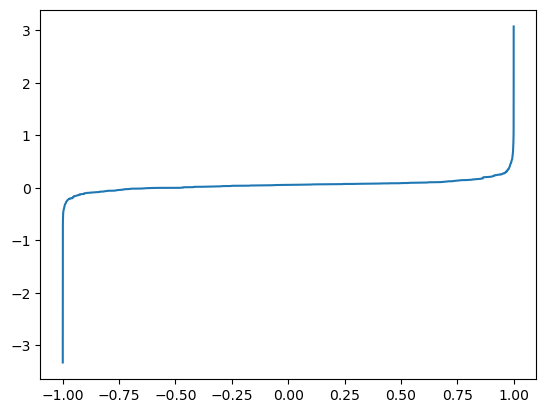

In [69]:
data = data_dict['ACTOR'][:, 0]   # only use the first dimension

mu, sigma = np.mean(data), np.std(data)

# Generate a real normal distribution with the same mean and variance
real_normal = np.random.normal(mu, sigma, len(data))

print(data.shape, real_normal.shape)

x = np.sort(data)
y = np.sort(real_normal)

plt.plot(x, y)

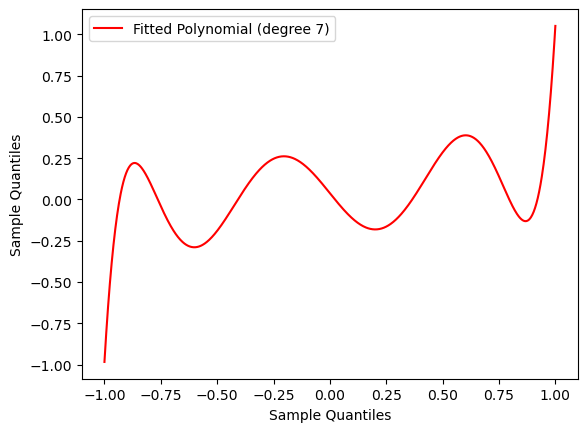

Polynomial Coefficients: [ 2.17190852e+01  6.72644801e-03 -3.51147984e+01 -6.62140593e-02
  1.61105133e+01  5.51780305e-02 -1.69698693e+00  3.79294400e-02]


In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Your code to generate data and real_normal here...

# Sort the data and real_normal arrays
x = np.sort(data)
y = np.sort(real_normal)

# Fit a polynomial curve to the Q-Q plot
degree = 7  # You can change the degree as needed
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Generate points on the curve for plotting
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = polynomial(x_fit)

# Plot the Q-Q plot
# plt.scatter(x, y, label="Q-Q Plot")

# Plot the fitted polynomial curve
plt.plot(x_fit, y_fit, color='red', label=f"Fitted Polynomial (degree {degree})")

# Add labels and legend
plt.xlabel("Sample Quantiles")
plt.ylabel("Sample Quantiles")
plt.legend()

# Show the plot
plt.show()

# Print the coefficients of the fitted polynomial
print("Polynomial Coefficients:", coefficients)


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), dpi=200)

astonishing_colors = ['#FF0000', '#FFA500', '#FF1493', '#00bb00', '#00FFFF', '#0000FF', '#8A2BE2', '#BB00FF', '#FF1493', '#00FF7F']
cnt = 0
for name, data in data_dict.items():
    data = data[:, 0]   # only use the first dimension
    qqplot(data, line=None, ax=ax, fit=True, marker=None, linestyle='-', color=astonishing_colors[cnt], label=name, linewidth=1, alpha=0.5)
    cnt += 1

ax.plot(ax.get_xlim(), ax.get_xlim(), '--', label='Gaussian Distribution', linewidth=1, color='#00AAFF')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_title("")

legend = ax.legend(fontsize='small')
legend.get_frame().set_alpha(0)

plt.show()

/tmp/ipykernel_22735/134031870.py:34: RankWarning: Polyfit may be poorly conditioned
  qqplot_revised(data_dict, curve_degree=7)
/tmp/ipykernel_22735/134031870.py:34: RankWarning: Polyfit may be poorly conditioned
  qqplot_revised(data_dict, curve_degree=7)
/tmp/ipykernel_22735/134031870.py:34: RankWarning: Polyfit may be poorly conditioned
  qqplot_revised(data_dict, curve_degree=7)


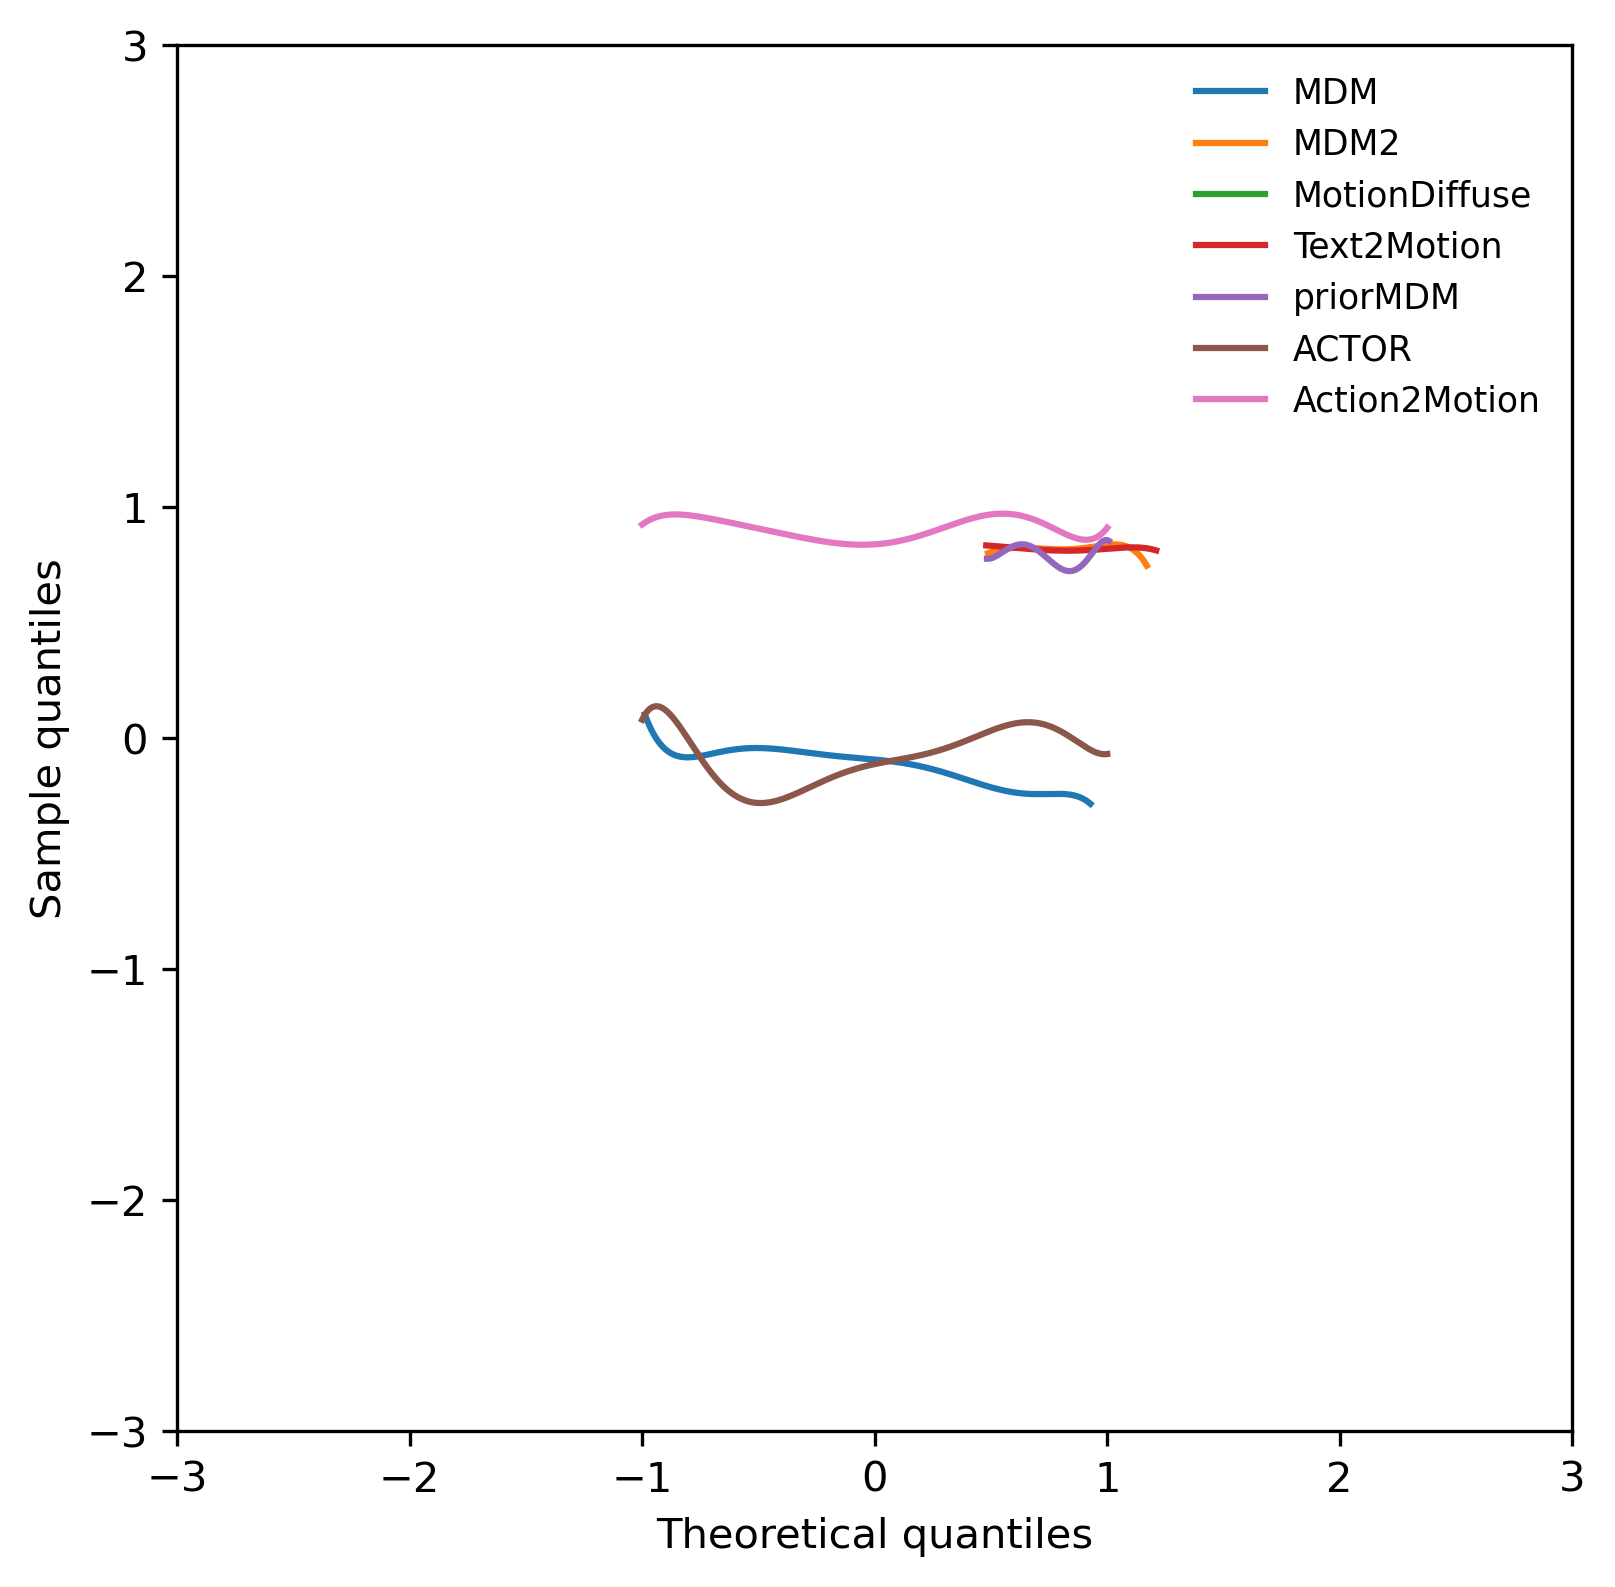

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def qqplot_revised(data_dict, curve_degree=7):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

    for name, data in data_dict.items():
        data = data[:, 0]
        x = np.sort(data)
        
        mu, sigma = np.mean(data), np.std(data)
        y = np.random.normal(mu, sigma, len(data))
        
        
        coefficients = np.polyfit(x, y, degree)
        polynomial = np.poly1d(coefficients)
        
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = polynomial(x_fit)
        
        plt.plot(x_fit, y_fit, label=name)
        
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_title("")
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Sample quantiles")

    legend = ax.legend(fontsize='small')
    legend.get_frame().set_alpha(0)

    plt.show()
    
qqplot_revised(data_dict, curve_degree=7)
